# Gaussian Mixture Models on Synthetic Data

Gaussian Mixture Models (GMMs) are a cornerstone of unsupervised machine learning, used primarily for soft clustering and density estimation. Unlike K-Means, which assigns each data point to exactly one cluster ("hard" clustering), GMMs provide a probability distribution that describes how likely a point belongs to each cluster.

This example uses a synthetic dataset—artificially generated data that mimics real-world statistical patterns—to provide a "ground truth" for evaluating the model's performance.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

Generate synthetic data using `make_blobs`

In [ ]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

## 1. Visualizing data


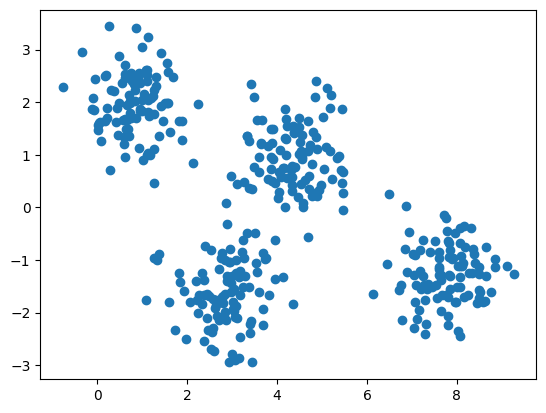

In [ ]:
plt.scatter(X[:,0], X[:,1])

## 2. Fit a 4-component GMM


In [ ]:
gmm = GaussianMixture(
    n_components=4,
    covariance_type="full",
    random_state=42
)
gmm.fit(X)

GaussianMixture(n_components=4, random_state=42)

## 3. Inspect learned parameters

In [ ]:
print("Weights:", gmm.weights_)
print("Means:\n", gmm.means_)
print("Covariances:\n", gmm.covariances_)

Weights: [0.24702726 0.24878736 0.24963804 0.25454734]
Means:
 [[ 2.84407337 -1.62828783]
 [ 7.76222624 -1.27635633]
 [ 0.83760086  1.9579654 ]
 [ 4.36221851  0.93141671]]
Covariances:
 [[[ 0.38465995  0.02716798]
  [ 0.02716798  0.37394003]]

 [[ 0.36530305  0.01293533]
  [ 0.01293533  0.28921965]]

 [[ 0.29768676 -0.02444193]
  [-0.02444193  0.34173529]]

 [[ 0.40398685 -0.00235346]
  [-0.00235346  0.36933794]]]


## 4. Compute cluster responsibilities

In [ ]:
responsibilities = gmm.predict_proba(X)

i = 100  # example index
print(responsibilities[i])


[1.93914682e-14 1.00000000e+00 1.48359915e-41 8.54887926e-11]


## 5. Hard assignment from GMM

In [ ]:
labels_gmm = gmm.predict(X)

## 6. Plot clusters found by GMM

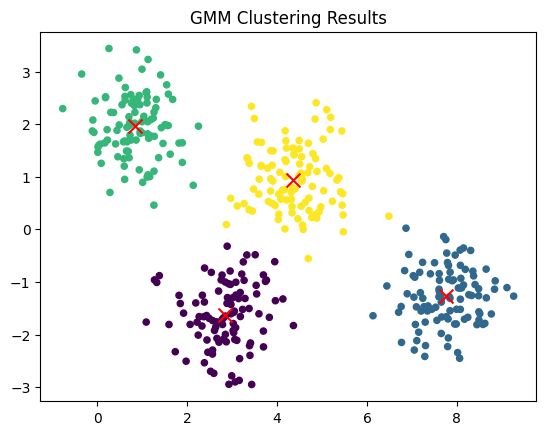

In [ ]:
plt.scatter(X[:,0], X[:,1], c=labels_gmm, cmap="viridis", s=20)
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    c="red",
    marker="x",
    s=100
)

plt.title("GMM Clustering Results")
plt.show()


## 7. Compute log-likelihood

The log-likelihood of a Gaussian Mixture Model (GMM) measures how well the model, defined by its component means, covariances, and weights, explains the observed data; a higher log-likelihood indicates the data points are more probable under the fitted mixture of Gaussians,

In [ ]:
log_likelihood = gmm.score(X)
print("Average log-likelihood:", log_likelihood)

## 8. Compare with K-means
- Fit K-means with k=2 and plot the result.

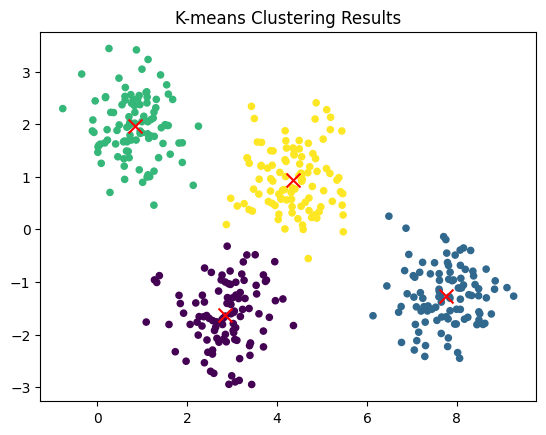

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels_km = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels_km, cmap="viridis", s=20)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red",
    marker="x",
    s=100
)
plt.title("K-means Clustering Results")
plt.show()


## 9. Model selection with BIC

The Bayesian Information Criterion (BIC) is a statistical tool for selecting the best model from a set of candidates, balancing model fit with complexity by penalizing extra parameters to prevent overfitting, with lower BIC values indicating a preferred model. It



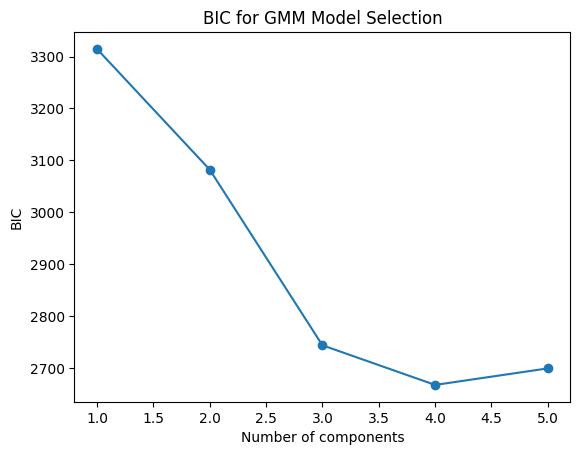

In [ ]:
bics = []
ks = range(1, 6)

for k in ks:
    gmm_k = GaussianMixture(n_components=k, random_state=42)
    gmm_k.fit(X)
    bics.append(gmm_k.bic(X))

plt.plot(ks, bics, marker='o')
plt.xlabel("Number of components")
plt.ylabel("BIC")
plt.title("BIC for GMM Model Selection")
plt.show()
